# EXPLORATORY DATA ANALYSIS ON IPL

**AUTHOR : KOMAL JANGRA**

In [4]:
from IPython.display import Image
img = 'IMG_20210617_194942.jpg'
Image(url=img , width = 700 , height = 700)

PROBLEM STATEMENT:

In [5]:
# As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.
# Suggest teams or players a company should endorse for its products.

**We will be analysing the above Problem Statement in categories**

**#CATEGORY1: Analysis of IPL Teams**

**#CATEGORY2: Analysis of IPL Players**

**#CATEGORY3: Analysis of IPL Matches** 

In [6]:
#importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# LOADING THE MATCHES DATASET

In [80]:
df_matches = pd.read_csv('matches.csv')
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# LOADING THE DELIVERIES DATASET 

In [8]:
df_deliveries = pd.read_csv('deliveries.csv')
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# DATA PRE-PROCESSING FOR MATCHES DATASET

In [9]:
df_matches.shape

(756, 18)

**So we have 756  IPL matches  with 18 columns**

In [10]:
df_matches.info

<bound method DataFrame.info of         id  season           city        date                        team1  \
0        1    2017      Hyderabad  2017-04-05          Sunrisers Hyderabad   
1        2    2017           Pune  2017-04-06               Mumbai Indians   
2        3    2017         Rajkot  2017-04-07                Gujarat Lions   
3        4    2017         Indore  2017-04-08       Rising Pune Supergiant   
4        5    2017      Bangalore  2017-04-08  Royal Challengers Bangalore   
..     ...     ...            ...         ...                          ...   
751  11347    2019         Mumbai    05/05/19        Kolkata Knight Riders   
752  11412    2019        Chennai    07/05/19          Chennai Super Kings   
753  11413    2019  Visakhapatnam    08/05/19          Sunrisers Hyderabad   
754  11414    2019  Visakhapatnam    10/05/19               Delhi Capitals   
755  11415    2019      Hyderabad    12/05/19               Mumbai Indians   

                           team

In [11]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [12]:
#Let's Drop the columns which are'nt required for the Analysis

In [13]:
df_matches = df_matches.drop(['umpire1','umpire2','umpire3'],axis = 1)

In [14]:
df_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')

In [15]:
#Checking the info of the Matches Datset


df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
dtypes: int64(5), object(10)
memory usage: 88.7+ KB


**This shows there are some missing values in the Dataset**

In [16]:
#Checking the count of Missing value in the Dataset


df_matches.isna().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

**There are 7 missing values in 'city' column,4 missing values in 'winner' column and 4 missing values in 'player_of_match'**

In [17]:
# Let's work on these Missing Values

df_matches['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [18]:
df_matches[df_matches.city.isnull()][['city','date']]

,city,date
461,NaN,2014-04-19
462,NaN,2014-04-19
466,NaN,2014-04-23
468,NaN,2014-04-25
469,NaN,2014-04-25
474,NaN,2014-04-28
476,NaN,2014-04-30


**We had 7 missing values in city column, and the year in which all the values were missing was of year 2014,So from Web search we can find out that in 2014 IPL was played in DUBAI , by this we can fill the missing values with DUBAI**

In [19]:
#Now we will fill missing values in city column with 'Dubai'

df_matches.city = df_matches.fillna('Dubai')
df_matches.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

**We dont have any missing values in city column now**

In [20]:
#Let's work on the missing values of'winner' and  'player_of_match' columns

df_matches[df_matches.winner.isnull()][['result','winner','player_of_match']]

,result,winner,player_of_match
300,no result,NaN,NaN
545,no result,NaN,NaN
570,no result,NaN,NaN
744,no result,NaN,NaN


**With this we find out that the values of 'result' column corresponding to  missing values of both the 'winner' and 'player_of_match' column has no result as its value so we can ignore and can proceed further.These null values are justified**

# DATA PRE-PROCESSING OF DELIVERIES DATASET

In [21]:
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [22]:
df_deliveries.shape

(179078, 21)

**The Data set contains 179078 deliveries data with 21 columns**

In [23]:
df_deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [24]:
# Checking info of the Dataset

df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

# CATEGORY1: ANALYSIS OF IPL TEAMS

In [25]:
teams = df_matches['winner'].value_counts()
teams

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

**We can see that we have two different entries i.e 'Rising Pune Supergiant' and 'Rising Pune Supergiants',we need to fix this first**

In [26]:
df_matches['winner'].replace(to_replace = 'Rising Pune Supergiant' ,value = 'Rising Pune Supergiants' , inplace = True)

In [27]:
teams=df_matches['winner'].value_counts()
teams

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

In [28]:
#To check no. of teams participated in IPL so far

len(teams)

14

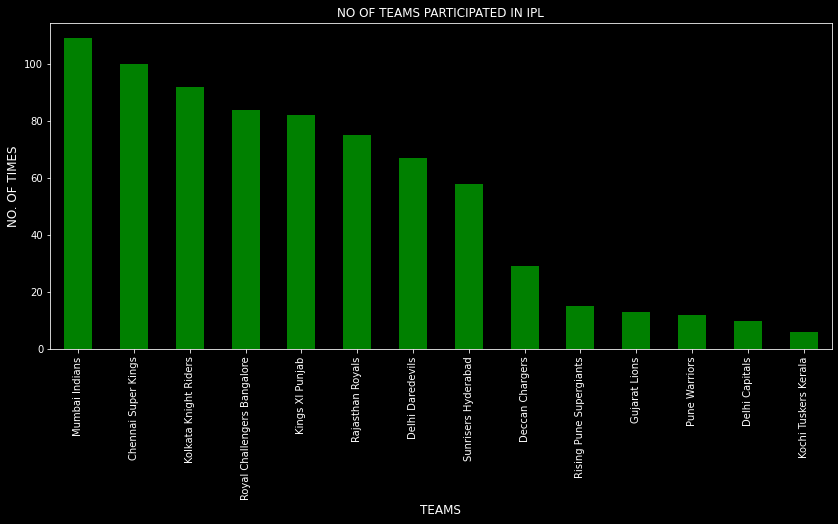

In [77]:
plt.figure(figsize = (14,6))
teams=df_matches['winner'].value_counts().plot(kind = 'bar' , color = 'green')
plt.title('NO OF TEAMS PARTICIPATED IN IPL' ,fontsize = 12)
plt.xlabel('TEAMS',fontsize=12)
plt.ylabel('NO. OF TIMES',fontsize =12)
plt.style.use('dark_background')

**There are 14 teams who played in IPL so far**

# TEAMS WITH MAXIMUM WINS

In [30]:
df_matches['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

**This shows that Mumbai Indian won maximum times ,now we will repesent this graphically**

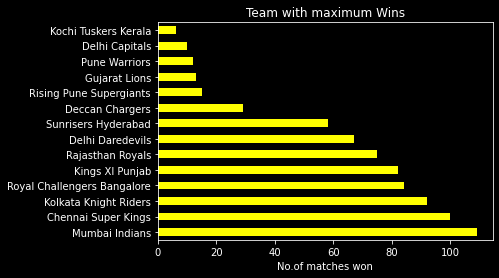

In [31]:
df_matches['winner'].value_counts().plot(kind='barh', color='yellow')
plt.title('Team with maximum Wins')
plt.xlabel('No.of matches won')
plt.style.use('dark_background')

**Hence proved by Bar plot that MUMBAI INDIAN  has maximum wins followed by Chennai Super Kings and KKR**

# TEAMS WITH MAXIMUM IPL TITLES

In [32]:
# Creating a new Dataframe

winning_teams = df_matches[['season','winner']]
winner_team = {}
for i in sorted(winning_teams.season.unique()):
    winner_team[i]=winning_teams[winning_teams.season==i]['winner'].tail(1).values[0]
    
winner_IPL=pd.Series(winner_team)    
winner_IPL=pd.DataFrame(winner_IPL, columns=['winner_team'])
print('Season Wise Winner',winner_IPL)

Season Wise Winner                 winner_team
2008       Rajasthan Royals
2009        Deccan Chargers
2010    Chennai Super Kings
2011    Chennai Super Kings
2012  Kolkata Knight Riders
2013         Mumbai Indians
2014  Kolkata Knight Riders
2015         Mumbai Indians
2016    Sunrisers Hyderabad
2017         Mumbai Indians
2018    Chennai Super Kings
2019         Mumbai Indians


Text(0, 0.5, 'Number of Season')

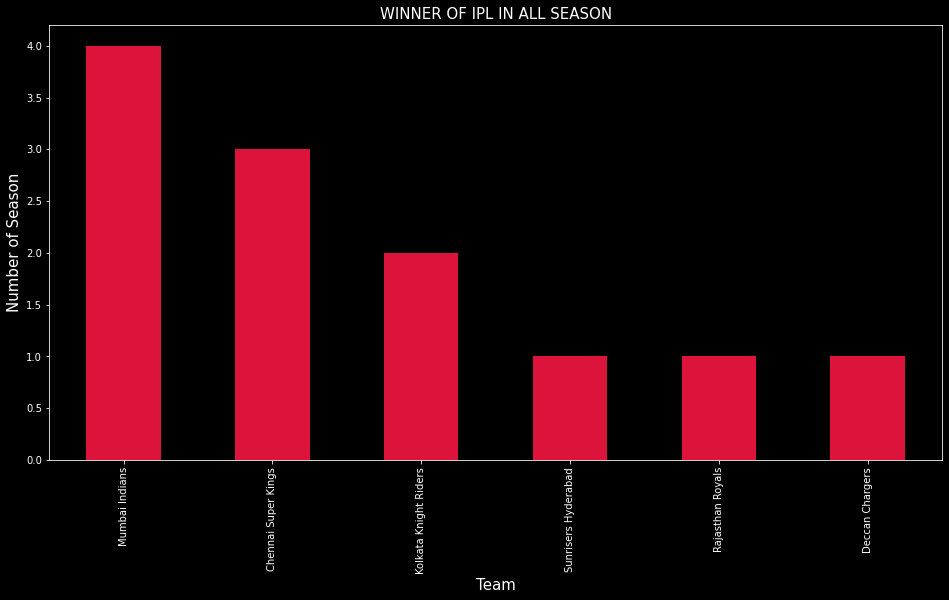

In [33]:
#Now we'll plot this graphically

plt.figure(figsize=(16,8))
winner_IPL['winner_team'].value_counts().plot(kind = 'bar' ,color = 'crimson')
plt.title('WINNER OF IPL IN ALL SEASON', fontsize=15)
plt.xlabel('Team',fontsize=15)
plt.ylabel('Number of Season', fontsize=15)

**Clearly we can see that MUMBAI INDIANS is most Successful Team with 4 IPL times,followed by CSK(3 IPL Titles)and KKR(2 IPL Titles)**

# IMPACT OF TOSS ON TEAM WINS

In [34]:
most_toss_wins = df_matches['toss_winner'].value_counts()
most_toss_wins

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

**Here again Rising Pune Supergiants is again appearing twice and we need to fix this**

In [35]:
df_matches['toss_winner'].replace(to_replace = 'Rising Pune Supergiant' ,value = 'Rising Pune Supergiants' , inplace= True )
most_toss_wins=df_matches['toss_winner'].value_counts()
most_toss_wins

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiants        13
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64

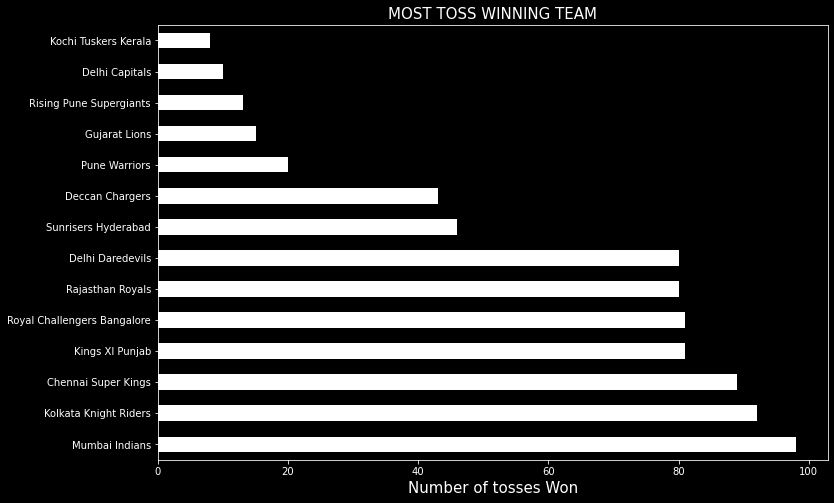

In [36]:
plt.figure(figsize=(12,8))
winner_matches=df_matches['toss_winner'].value_counts().plot(kind= 'barh' , color = 'white')
plt.title('MOST TOSS WINNING TEAM',fontsize =15)
plt.xlabel('Number of tosses Won',fontsize=15)
plt.style.use('dark_background')

**Here we Mumbai Indian won the toss maximum times i.e 98 times followed by KKR and CSK.It means winning the toss has direct impact on winning the match**

# TOSS DECISION BY TEAMS

In [37]:
toss_decision = df_matches['toss_decision'].value_counts()
toss_decision

field    463
bat      293
Name: toss_decision, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

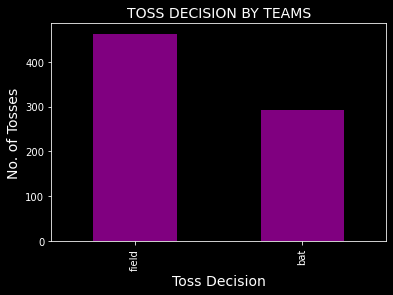

In [38]:
df_matches['toss_decision'].value_counts().plot(kind = 'bar' , color = 'purple')
plt.title('TOSS DECISION BY TEAMS', fontsize = 14)
plt.xlabel('Toss Decision', fontsize=14)
plt.ylabel('No. of Tosses', fontsize=14)
plt.style.use('dark_background')
plt.show

**So this graph  clearly justifies the information of teams choosing to field 463 times and batting 293 times**

**INDIVIDUAL TEAM TOSS DECISION AFTER WINNING THE TOSS**

<function matplotlib.pyplot.show(close=None, block=None)>

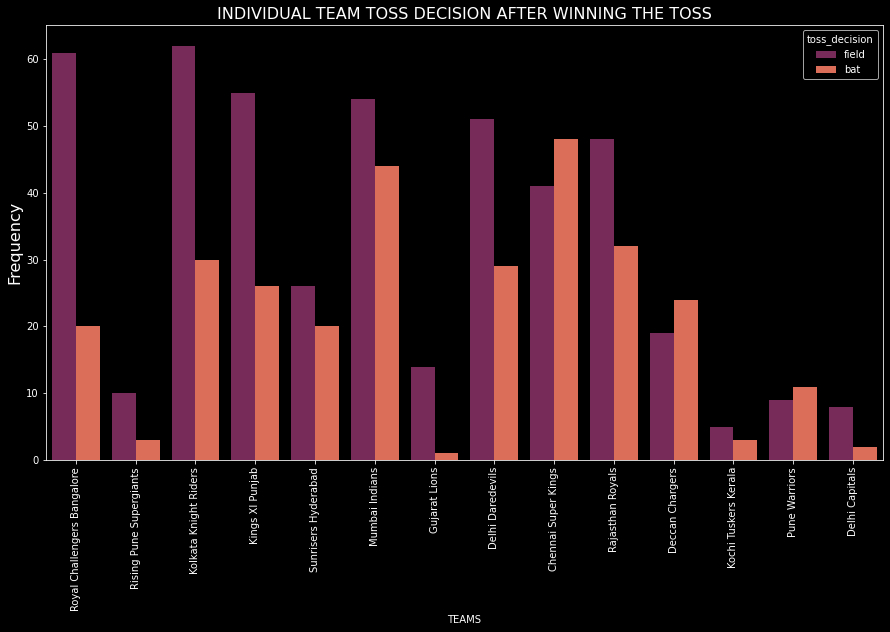

In [39]:
plt.figure(figsize= (15,8))
sns.countplot(x ='toss_winner' , data = df_matches , hue = 'toss_decision' , palette = 'rocket')
plt.title('INDIVIDUAL TEAM TOSS DECISION AFTER WINNING THE TOSS' , fontsize = 16)
plt.xlabel('TEAMS')
plt.xticks(rotation =90)
plt.ylabel('Frequency' , fontsize =16)
plt.show

**Teams winning by Batting First**

In [40]:
most_wins_batting_first = df_matches.winner[df_matches.win_by_runs!=0].value_counts()
most_wins_batting_first

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Rising Pune Supergiants         7
Pune Warriors                   6
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

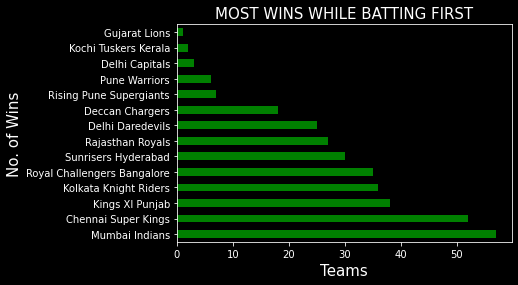

In [41]:
most_wins_batting_first = df_matches.winner[df_matches.win_by_runs!=0].value_counts().plot(kind = 'barh', color= 'green')
plt.title('MOST WINS WHILE BATTING FIRST',fontsize = 15)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('No. of Wins',fontsize=15)
plt.style.use('dark_background')
plt.show

**This is clearly depicting that Mumbai Indians won 57 times while winning the toss and choosing to bat first.**

**Teams won by Fielding First**

In [42]:
most_wins_fielding_first = df_matches.winner[df_matches.win_by_wickets!=0].value_counts()
most_wins_fielding_first

Kolkata Knight Riders          56
Mumbai Indians                 50
Chennai Super Kings            48
Royal Challengers Bangalore    48
Rajasthan Royals               46
Delhi Daredevils               42
Kings XI Punjab                42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Rising Pune Supergiants         8
Pune Warriors                   6
Delhi Capitals                  6
Kochi Tuskers Kerala            4
Name: winner, dtype: int64

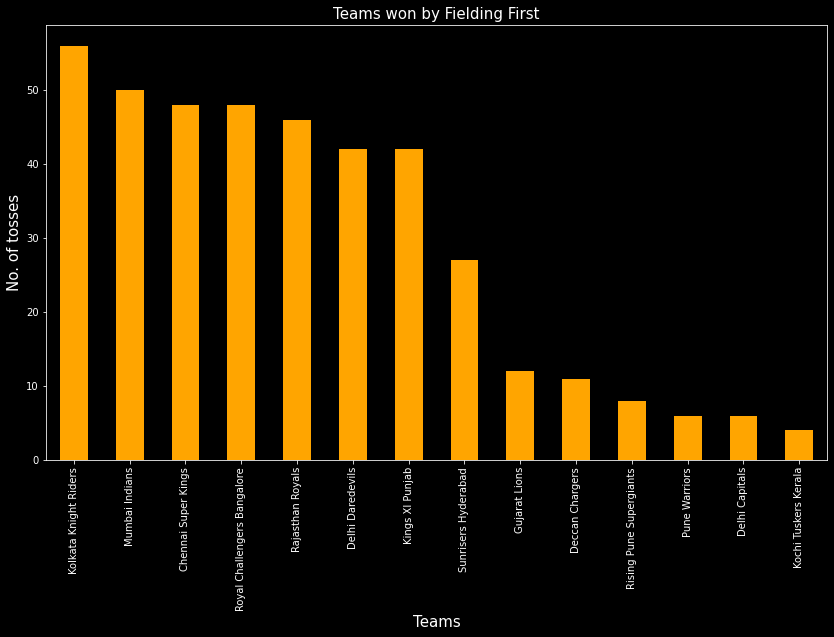

In [43]:
plt.figure(figsize = (14,8))
most_wins_fielding_first = df_matches.winner[df_matches.win_by_wickets!=0].value_counts().plot(kind = 'bar', color = 'orange')
plt.title('Teams won by Fielding First' , fontsize = 15)
plt.xlabel('Teams',fontsize = 15)
plt.ylabel('No. of tosses' , fontsize = 15)
plt.style.use('dark_background')


**So this shows that KKR won 57 times by fielding first,followed by Mumbai Indians and Royal Challengers Bangalore**

**OBSERVATION:**

* "MUMBAI INDIANS" won maximum times followed by "CSK and KKR".
* "MUMBAI INDIANS" won the IPL Title maxium no. of times followed  by "CSK & KKR".
* "MUMBAI INDIANS" won the toss maximum no. of times followed by "CSK & KKR".
* Teams preffered to field first after winning the toss.
* If team won the toss and chose to field first,that team won the match maximum no. of times.


# **ANALYSIS OF IPL PLAYERS**

**PLAYER WHO WON MAN OF THE MATCH MAXIMUM TIMES**

In [44]:
most_player_of_match = df_matches['player_of_match'].value_counts()[0:10]
most_player_of_match

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
Name: player_of_match, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

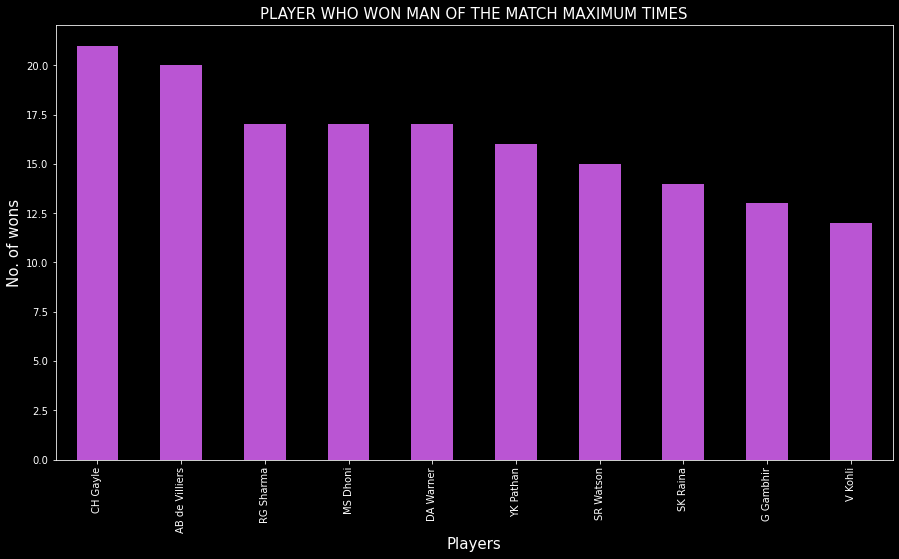

In [45]:
plt.figure(figsize=(15,8))
most_player_of_match = df_matches['player_of_match'].value_counts()[0:10].plot(kind = 'bar' , color = 'mediumorchid')
plt.title('PLAYER WHO WON MAN OF THE MATCH MAXIMUM TIMES', fontsize = 15)
plt.xlabel('Players',fontsize=15)
plt.ylabel('No. of wons',fontsize= 15)
plt.style.use('dark_background')
plt.show

**We can Observe ,that CH GAYLE won the maximum no .of time Man of the Match title,followed by AB de Villers and MS Dhoni with this we can also infer that CH GAYLE  is the most valuable Player to his team**

**MOST DELIVERIES PLAYED BY BATSMAN**

In [46]:
most_played_deliveries=df_deliveries['batsman'].value_counts()[0:10]
most_played_deliveries

V Kohli       4211
SK Raina      4044
RG Sharma     3816
S Dhawan      3776
G Gambhir     3524
RV Uthappa    3492
DA Warner     3398
MS Dhoni      3318
AM Rahane     3215
CH Gayle      3131
Name: batsman, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

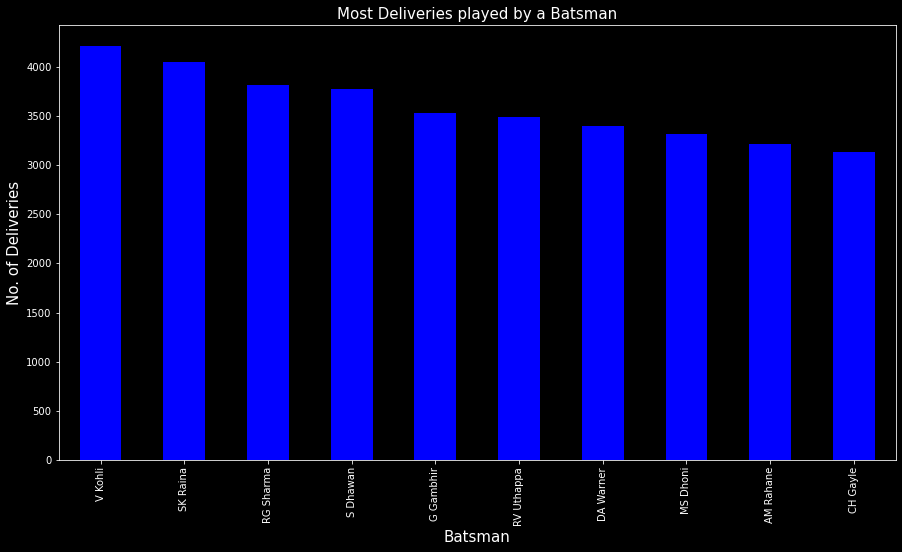

In [47]:
plt.figure(figsize=(15,8))
most_played_deliveries=df_deliveries['batsman'].value_counts()[0:10].plot(kind = 'bar' , color = 'blue')
plt.title('Most Deliveries played by a Batsman',fontsize= 15)
plt.xlabel('Batsman',fontsize=15)
plt.ylabel('No. of Deliveries', fontsize=15)
plt.style.use('dark_background')
plt.show

 **VIRAT KOHLI played most no. of balls in the history of entire IPL followed by Suresh Raina and RG Sharma**

**BOWLERS WITH MOST DELIVERIES**

In [48]:
most_bowl_deliveries = df_deliveries['bowler'].value_counts()[0:10]
most_bowl_deliveries

Harbhajan Singh    3451
A Mishra           3172
PP Chawla          3157
R Ashwin           3016
SL Malinga         2974
DJ Bravo           2711
B Kumar            2707
P Kumar            2637
UT Yadav           2605
SP Narine          2600
Name: bowler, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

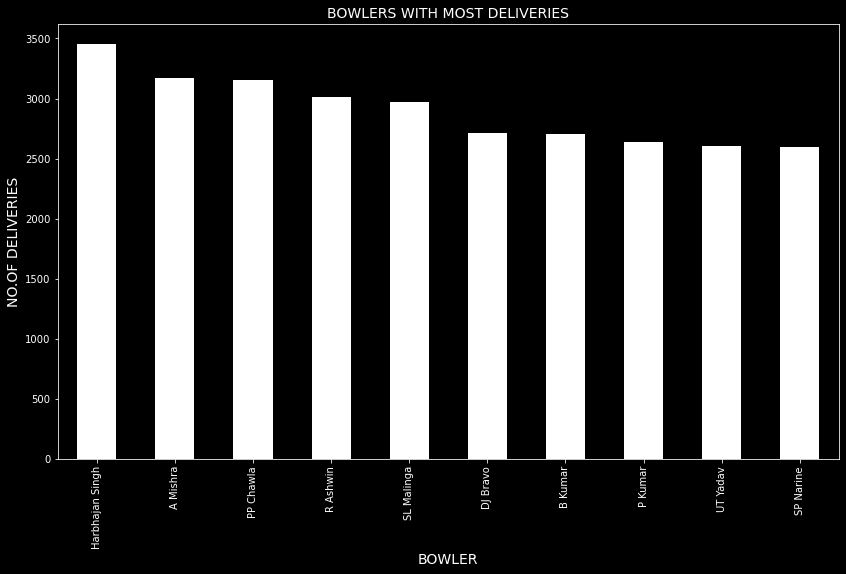

In [49]:
# Plotting it graphically


plt.figure(figsize = (14,8))
most_bowl_deliveries = df_deliveries['bowler'].value_counts()[0:10].plot(kind = 'bar' , color = 'white')
plt.title('BOWLERS WITH MOST DELIVERIES' , fontsize = 14)
plt.xlabel('BOWLER',fontsize = 14)
plt.ylabel('NO.OF DELIVERIES', fontsize =14)
plt.style.use('dark_background')
plt.show

**HARBHAJAN SINGH bowled maximum no. of deliveries in the IPL History followed by A Mishra and then PP Chawla**

# **TOP 15 PLAYERS WITH MOST RUNS IN IPL HISTORY**

In [50]:
top_15_run_getter = df_deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False)[0:15]
top_15_run_getter

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
AM Rahane         3850
KD Karthik        3688
SR Watson         3614
AT Rayudu         3326
YK Pathan         3241
Name: batsman_runs, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

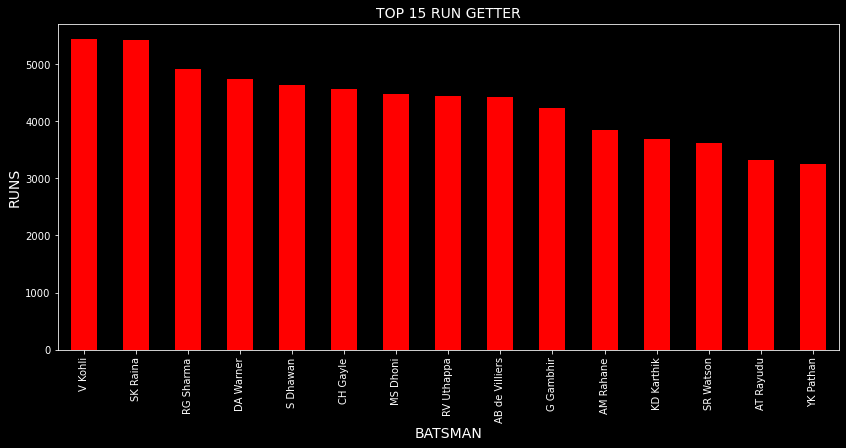

In [51]:
#Plotting this Graphically


plt.figure(figsize = (14,6))
top_15_run_getter = df_deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False)[0:15].plot(kind = 'bar' , color = 'red')
plt.title('TOP 15 RUN GETTER' , fontsize = 14)
plt.xlabel('BATSMAN', fontsize = 14)
plt.ylabel('RUNS',fontsize = 14)
plt.style.use('dark_background')
plt.show

**With this we found out that Virat Kohli is top scorer followed by SK Raina and then we have RG Sharma ,also we can say that the top 3 scorers are Indian Batsman only**

Now Let's Compare Top 3 Run Scorer Batting Performance by Runs per Season

# COMPARISON OF TOP 3 RUN SCORER PER IPL SEASON

**1.Virat Kohli**

**2.Suresh Raina**

**3.Rohit Sharma**

In [52]:
# For this we will be meging the two Datasets

df = pd.merge(df_matches,df_deliveries,left_on = 'id', right_on = 'match_id')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,1,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,1,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,1,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,1,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,1,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


**Now we'll start the Comparison**

**1.Virat Kohli's runs per season**

In [53]:
vkohli = df[df['batsman'] == 'V Kohli']
vkohli = vkohli.groupby('season')['batsman_runs'].sum()
vkohli

season
2008    165
2009    246
2010    307
2011    557
2012    364
2013    639
2014    359
2015    505
2016    973
2017    308
2018    539
2019    472
Name: batsman_runs, dtype: int64

**2.Suresh Raina's runs per season**

In [54]:
sraina = df[df['batsman'] == 'SK Raina']
sraina = sraina.groupby('season')['batsman_runs'].sum()
sraina

season
2008    421
2009    434
2010    528
2011    438
2012    441
2013    548
2014    523
2015    374
2016    399
2017    442
2018    466
2019    401
Name: batsman_runs, dtype: int64

**3.Rohit Sharma's runs per Season**

In [55]:
rsharma = df[df['batsman'] == 'RG Sharma']
rsharma = rsharma.groupby('season')['batsman_runs'].sum()
rsharma

season
2008    404
2009    362
2010    404
2011    372
2012    433
2013    538
2014    390
2015    482
2016    489
2017    333
2018    297
2019    410
Name: batsman_runs, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

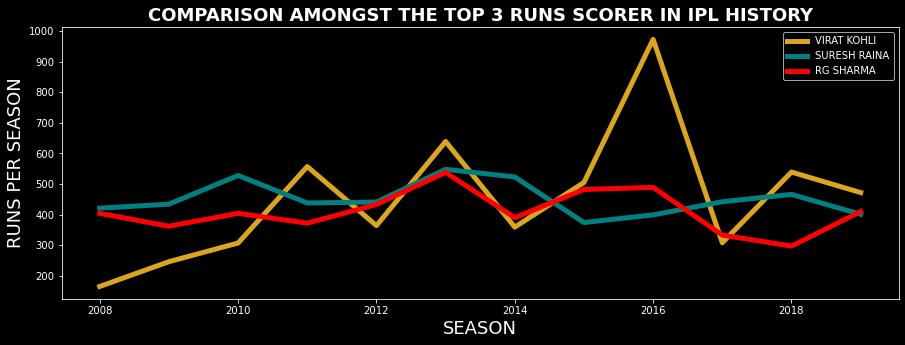

In [56]:
vkohli.plot(kind = 'line' , linewidth = 5 , figsize= (15,5) ,color = 'goldenrod' , label = 'VIRAT KOHLI')
sraina.plot(kind = 'line' , linewidth = 5 , figsize= (15,5), color = 'teal' , label = 'SURESH RAINA')
rsharma.plot(kind = 'line', linewidth = 5 , figsize = (15,5), color= 'red', label = 'RG SHARMA')
plt.title('COMPARISON AMONGST THE TOP 3 RUNS SCORER IN IPL HISTORY', fontsize =18 , fontweight = 'bold')
plt.xlabel('SEASON',fontsize=18)
plt.ylabel('RUNS PER SEASON', fontsize=18)
plt.style.use('dark_background')
plt.legend()
plt.show

**INFERENCE:**

1. Suresh Raina is the most consistent performer in the IPL History.
2. Rohit Sharma is also consistent performer but not as consistent as Suresh Raina.
3. Virat Kohli did'nt started off well in IPL.We can see there is a Sharp Rise & Decline of Runs Trend in Alternate Season and as we can sharp rise in Virat Kohli in 2016 season that means his most successful season was 2016 where he performed exceptionally well.
   Also Virat Kohli is least consistent among the three players.

**TOP WICKET TAKER**

<function matplotlib.pyplot.show(close=None, block=None)>

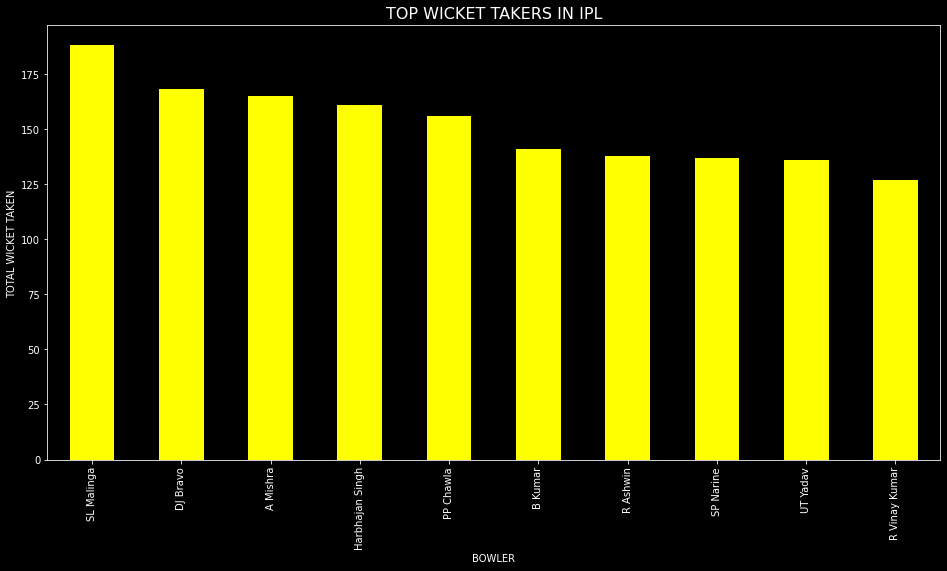

In [57]:
df.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10).plot(kind = 'bar' , figsize = (16,8) , color = 'yellow' )
plt.title('TOP WICKET TAKERS IN IPL', fontsize=16)
plt.xlabel('BOWLER')
plt.xticks(rotation = 90)
plt.ylabel('TOTAL WICKET TAKEN ')
plt.show

SL Malinga has taken most no. of wickets followed by DJ bravo and A Mishra

**TYPE OF DISMISSAL**

<function matplotlib.pyplot.show(close=None, block=None)>

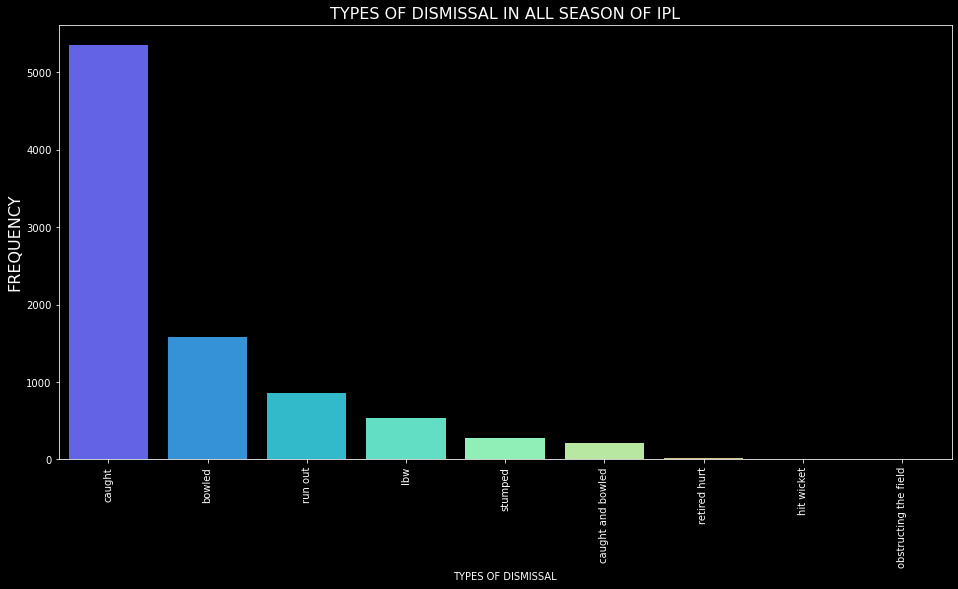

In [58]:
plt.figure(figsize = (16,8))
dismissal_type = df_deliveries.dismissal_kind.value_counts()
sns.barplot(x=dismissal_type.index , y=dismissal_type , palette = 'rainbow')
plt.title('TYPES OF DISMISSAL IN ALL SEASON OF IPL', fontsize = 16)
plt.xlabel('TYPES OF DISMISSAL')
plt.xticks(rotation=90)
plt.ylabel('FREQUENCY', fontsize=16)
plt.show

**THE MOST DISMISSALS WERE DONE BY CATCHING ONLY**

# EXTRA RUNS

**PLAYERS WHO CONCEDED WITH MOST EXTRA RUNS**

In [59]:
extra_runs = df_deliveries.groupby('bowler')['extra_runs'].sum().sort_values(ascending = False)[0:10]
extra_runs

bowler
SL Malinga         293
P Kumar            236
UT Yadav           219
DJ Bravo           201
B Kumar            197
I Sharma           194
RP Singh           181
DW Steyn           171
SR Watson          171
Harbhajan Singh    170
Name: extra_runs, dtype: int64

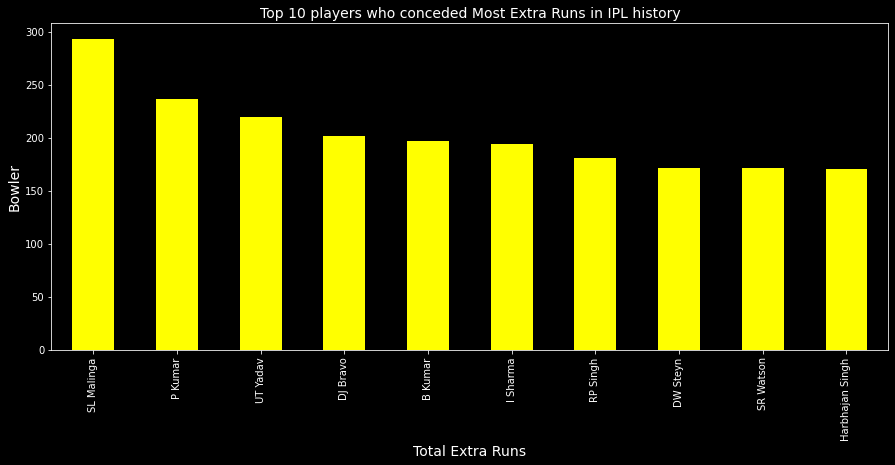

In [60]:
plt.figure(figsize = (15,6))
extra_runs = df_deliveries.groupby('bowler')['extra_runs'].sum().sort_values(ascending = False)[0:10].plot(kind = 'bar',color = 'yellow')
plt.title('Top 10 players who conceded Most Extra Runs in IPL history',fontsize=14)
plt.xlabel('Total Extra Runs', fontsize=14)
plt.ylabel('Bowler' , fontsize=14)
plt.style.use('dark_background')

**SL Malinga conceded with most extra runs in IPL history**

**Which Bowler dismissed which Batsman the most**

In [61]:
bowl_bat = df_deliveries.groupby('bowler')['player_dismissed'].value_counts().sort_values(ascending = False)[0:15]
bowl_bat

bowler         player_dismissed
Z Khan         MS Dhoni            7
PP Ojha        MS Dhoni            7
SP Narine      RG Sharma           6
B Kumar        PA Patel            6
               AM Rahane           6
R Ashwin       RV Uthappa          6
A Mishra       RG Sharma           6
PP Chawla      AT Rayudu           6
Z Khan         G Gambhir           6
R Vinay Kumar  RG Sharma           6
A Nehra        V Kohli             6
MM Sharma      AT Rayudu           6
RA Jadeja      SR Watson           5
               SPD Smith           5
Imran Tahir    Ishan Kishan        5
Name: player_dismissed, dtype: int64

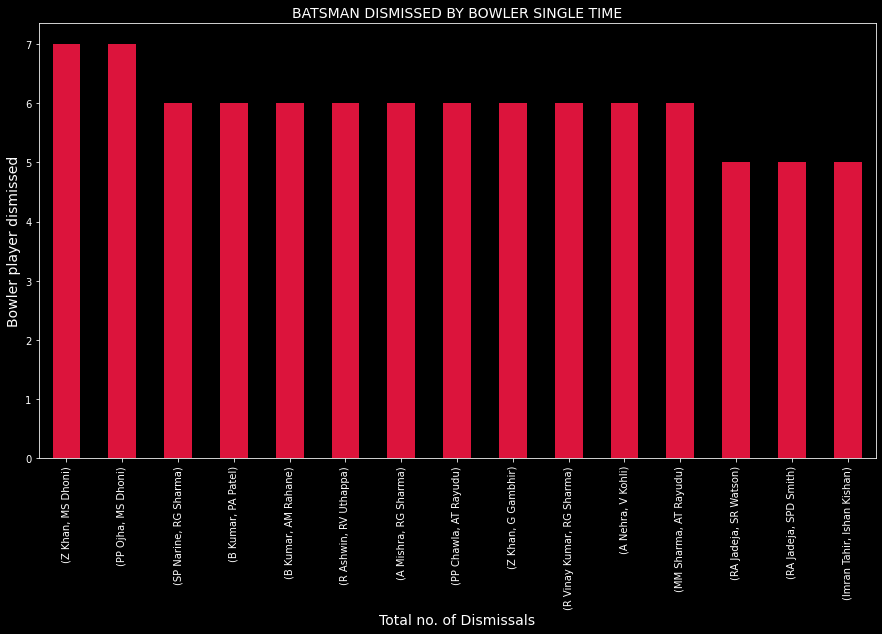

In [62]:
plt.figure(figsize= (15,8))
bowl_bat = df_deliveries.groupby('bowler')['player_dismissed'].value_counts().sort_values(ascending = False)[0:15].plot(kind = 'bar' , color = 'crimson')
plt.title('BATSMAN DISMISSED BY BOWLER SINGLE TIME',fontsize=14)
plt.xlabel('Total no. of Dismissals',fontsize = 14 , )
plt.ylabel('Bowler player dismissed', fontsize = 14)
plt.style.use('dark_background')

**We infer that MS Dhoni can't play at his best with Z Khan and Pragyan Ojha as they dismissed him most of the times i .e 7, followed by Rohit Sharma 6 times dismissal by 3 bowlers each (Vinay Kumar ,A Mishra and SP Narine)**

**PLAYERS WHO GOT DISMISSED MOST NO. OF TIMES**

In [63]:
got_dismissed = df_deliveries['player_dismissed'].value_counts()[:15]
got_dismissed

SK Raina          162
RG Sharma         155
RV Uthappa        153
V Kohli           143
S Dhawan          137
G Gambhir         136
KD Karthik        135
PA Patel          126
AM Rahane         116
SR Watson         115
AT Rayudu         115
Yuvraj Singh      111
YK Pathan         110
AB de Villiers    110
DA Warner         110
Name: player_dismissed, dtype: int64

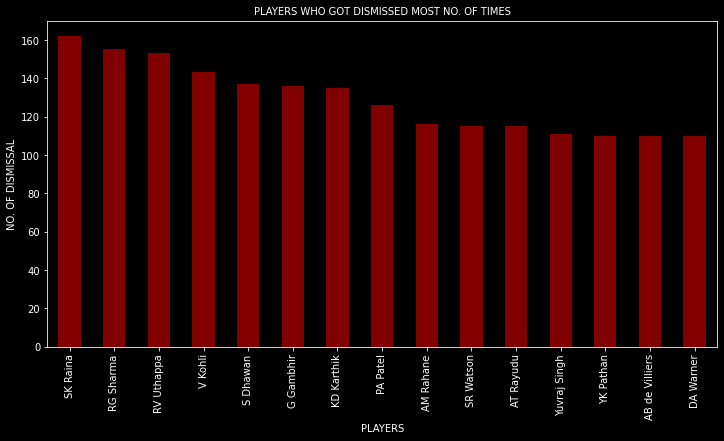

In [64]:
#Let's plot this now 

plt.figure(figsize= (12,6))
got_dismissed = df_deliveries['player_dismissed'].value_counts()[:15].plot(kind = 'bar' , color ='maroon')
plt.title('PLAYERS WHO GOT DISMISSED MOST NO. OF TIMES' , fontsize = 10)
plt.xlabel('PLAYERS',fontsize = 10)
plt.ylabel('NO. OF DISMISSAL' , fontsize = 10)
plt.style.use('dark_background')

**SK Raina got out the most followed by RG Sharma and RV Uthappa**

**TOP 10 BOWLERS BY DOT BALLS**

In [65]:
most_dotball_by_bowler =df_deliveries.bowler[df_deliveries.total_runs == 0].value_counts()[:10]
most_dotball_by_bowler

Harbhajan Singh    1244
SL Malinga         1144
B Kumar            1116
A Mishra           1108
PP Chawla          1100
P Kumar            1075
R Ashwin           1067
SP Narine          1038
DW Steyn            996
UT Yadav            942
Name: bowler, dtype: int64

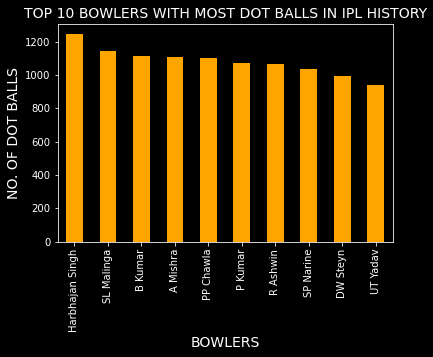

In [66]:
most_dotball_by_bowler =df_deliveries.bowler[df_deliveries.total_runs == 0].value_counts()[:10].plot(kind = 'bar' , color = 'orange')
plt.title('TOP 10 BOWLERS WITH MOST DOT BALLS IN IPL HISTORY', fontsize = 14)
plt.xlabel('BOWLERS',fontsize=14)
plt.ylabel('NO. OF DOT BALLS',fontsize =14)
plt.style.use('dark_background')

**Harbhajan gave the highest no. of Dot Balls,followed by SL Mainga and B Kumar**

**TOP 10 PLAYERS INVOLVED IN MOST DISMISSAL**

In [67]:
most_dismissal_by_player= df_deliveries['fielder'].value_counts()[:10]
most_dismissal_by_player

MS Dhoni          159
KD Karthik        152
RV Uthappa        125
SK Raina          115
AB de Villiers    114
PA Patel           97
RG Sharma          92
V Kohli            90
KA Pollard         85
WP Saha            82
Name: fielder, dtype: int64

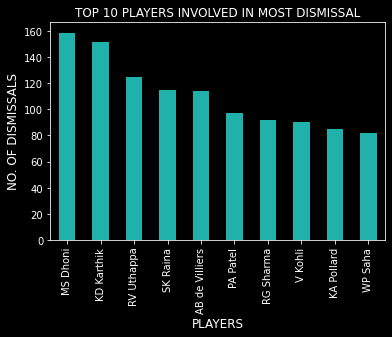

In [68]:
most_dismissal_by_player= df_deliveries['fielder'].value_counts()[:10].plot(kind = 'bar' , color = 'lightseagreen')
plt.title('TOP 10 PLAYERS INVOLVED IN MOST DISMISSAL', fontsize=12)
plt.xlabel('PLAYERS', fontsize=12)
plt.ylabel('NO. OF DISMISSALS' ,fontsize=12)
plt.style.use('dark_background')

**MS Dhoni involved in most no .of dismissals as Fielder followed by KD Karthik and RV Uthappa**

**OBSRVATIONS:**

* **CH GAYLE** won the MAN OF THE MATCH ,maximum no. of times.
* **V KOHLI** played the maximum no. of Deliveries.
* **HARBHAJAN SINGH** bowl the maximum no. of deliveries.
* **MALINGA** has taken the maximum no. of wickets.
* **CAUGHT** was most dismissal in entire IPL season.
* **MS DHONI** was involved in most no. of dismissals as Fielder followed by KD Karthik and RV Uthappa.

# CATEGORY3: ANALYSIS OF IPL MATCHES

In [81]:
venue_city = df_matches.groupby('venue')['city'].value_counts().sort_values(ascending = False)[0:10]
venue_city

venue                                       city      
Eden Gardens                                Kolkata       77
Wankhede Stadium                            Mumbai        73
Feroz Shah Kotla                            Delhi         67
M Chinnaswamy Stadium                       Bangalore     66
Rajiv Gandhi International Stadium, Uppal   Hyderabad     56
MA Chidambaram Stadium, Chepauk             Chennai       49
Sawai Mansingh Stadium                      Jaipur        47
Punjab Cricket Association Stadium, Mohali  Chandigarh    35
Maharashtra Cricket Association Stadium     Pune          21
Subrata Roy Sahara Stadium                  Pune          17
Name: city, dtype: int64

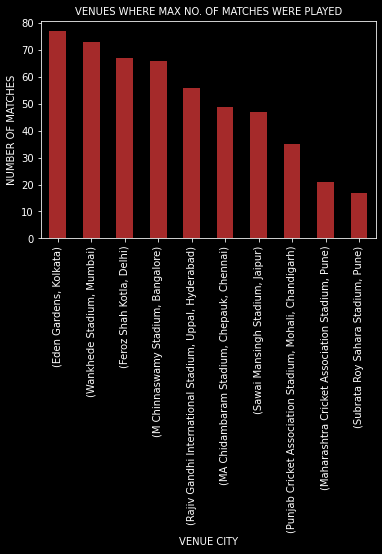

In [82]:
venue_city = df_matches.groupby('venue')['city'].value_counts().sort_values(ascending = False)[0:10].plot(kind = 'bar', color='brown')
plt.title('VENUES WHERE MAX NO. OF MATCHES WERE PLAYED',fontsize=10)
plt.xlabel('VENUE CITY',fontsize=10)
plt.ylabel('NUMBER OF MATCHES',fontsize=10)
plt.style.use('dark_background')

**So max no. of matches were played in EDEN GARDEN followed by Wankhede Stadium and then Feroz Shah Kotla**

**SEASON WISE MATCHES**

In [71]:
season_wise_matches=df_matches['season'].value_counts()
season_wise_matches

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2015    59
2017    59
2008    58
2009    57
Name: season, dtype: int64

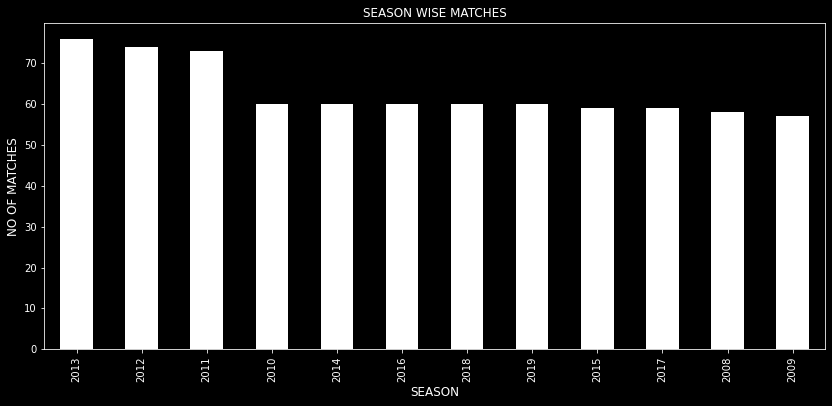

In [72]:
# Plotting it graphically

plt.figure(figsize = (14,6))
season_wise_matches=df_matches['season'].value_counts().plot(kind = 'bar' , color = 'white')
plt.title('SEASON WISE MATCHES')
plt.xlabel('SEASON' , fontsize = 12)
plt.ylabel('NO OF MATCHES' ,fontsize = 12)
plt.style.use('dark_background')

**This shows maximum matches were being played in 2013 followed by 2012 and then in 2011**

**MATCH RESULTS**

In [73]:
match_result = df_matches['result'].value_counts()
match_result

normal       743
tie            9
no result      4
Name: result, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

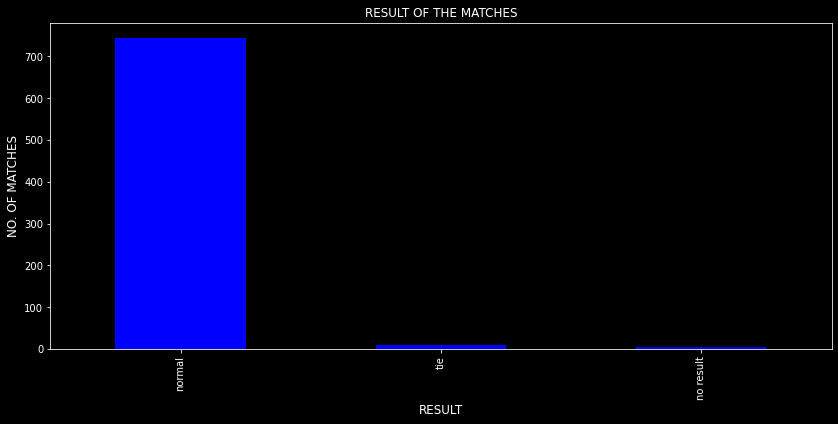

In [74]:
# Plotting it graphically


plt.figure(figsize = (14,6))
match_result = df_matches['result'].value_counts().plot(kind = 'bar', color = 'blue')
plt.title('RESULT OF THE MATCHES',fontsize = 12)
plt.xlabel('RESULT', fontsize = 12)
plt.ylabel('NO. OF MATCHES' , fontsize =12)
plt.style.use('dark_background')
plt.show

**With this we can infer that only 4 matches were played where there was no result found**

**SUPER OVER**

In [75]:
super_over = df_deliveries['is_super_over'].value_counts()
super_over

0    178997
1        81
Name: is_super_over, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

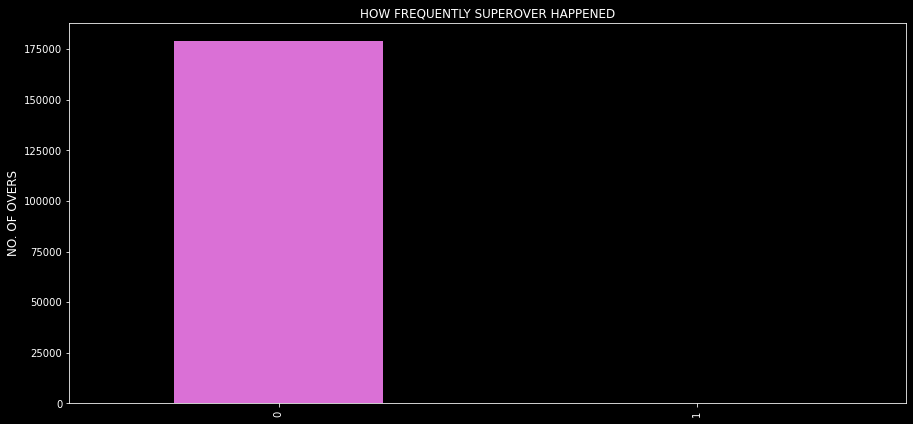

In [76]:
plt.figure(figsize = (15,7))
super_over = df_deliveries['is_super_over'].value_counts().plot(kind = 'bar' , color = 'orchid')
plt.title('HOW FREQUENTLY SUPEROVER HAPPENED', fontsize =12)
plt.ylabel('NO. OF OVERS',fontsize = 12)
plt.style.use('dark_background')
plt.show

**OBSERVATIONS:**

* Maximum matches were played at **EDEN GARDEN ,KOLKATA** .
* Most matches were played in 2013 season followed by 2012 and then 2011.
* Most dismissal was **CATCH**  in the IPL and least was **Obstructing the field** 
* There are 81 superovers bowled in IPL so far.

# CONCLUSION:

*  **MOST SUCCESSFUL TEAM**: MUMBAI INDIANS
*  **MOST SUCESSFUL PLAYER** : VIRAT KOHLI
*  **FACTORS CONTRIBUTING WIN /LOSS** : TOSS DECISION
*  **TEAM A COMPANY SHOULD ENDORSE** : MUMBAI INDIAN and CSK
*  **PLAYERS A COMPANY SHOULD ENDORSE** : GAYLE and VIRAT KOHLI
 